In [1]:
%matplotlib tk
import numpy as np
import hyperspy.api as hs
import pycrystem as pc
import pymatgen as pmg

In [2]:
si = pmg.Element("Si")
lattice = pmg.Lattice.cubic(5.431)
silicon = pmg.Structure.from_spacegroup("Fd-3m",lattice, [si], [[0, 0, 0]])

In [ ]:
size = 256
radius= 1.5
max_r = 1.2
sigma = 0.03

ediff = pc.ElectronDiffractionCalculator(300., 0.025)
diff_dat = ediff.calculate_ed_data(silicon, radius)

In [80]:
%%time
dpi = diff_dat.as_signal(size, sigma, max_r)

CPU times: user 288 ms, sys: 32 ms, total: 320 ms
Wall time: 149 ms


In [46]:
ground_truth = pc.ElectronDiffraction(dpi)

In [61]:
ground_truth.plot()

In [12]:
diff_dat

In [13]:
l,delta_l = np.linspace(-max_r, max_r, size,retstep=True)
coords = diff_dat.coordinates[:, :2]

In [15]:
### old_version_of_as_signal    
"""
x, y = np.meshgrid(l, l)
dp_dat = 0
g = Expression(_GAUSSIAN2D_EXPR, 'Gaussian2D', module='numexpr')
for (cx, cy), intensity in zip(coords, self.intensities):
    g.intensity.value = intensity
    g.sigma.value = sigma
    g.cx.value = cx
    g.cy.value = cy
    dp_dat += g.function(x, y)
dp = ElectronDiffraction(dp_dat)
dp.set_calibration(2*max_r/size)
""";

In [84]:
%%time
### current_single_peak_version

signal = np.zeros([size,size])
for i in np.arange(coords.shape[0]):
    x,y = coords[i,0]-(delta_l/2),coords[i,1]-(delta_l/2)
    x_num,y_num = np.sum(l < x)-1,np.sum(l < y)-1    
    signal[x_num,y_num] += diff_dat.intensities[i]
from skimage.filters import gaussian as point_spread
signal = point_spread(signal,sigma=sigma/delta_l)
from pycrystem import ElectronDiffraction
dp = ElectronDiffraction(signal)
#dp.set_calibration(2*max_r/size)

CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 10.6 ms


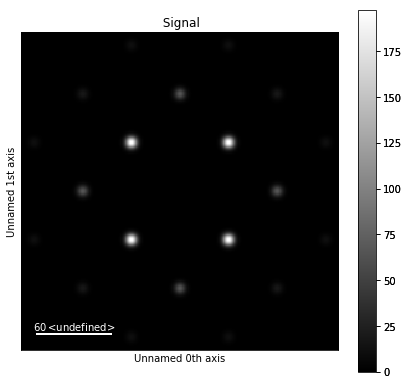

In [78]:
%matplotlib inline
ground_truth.plot()

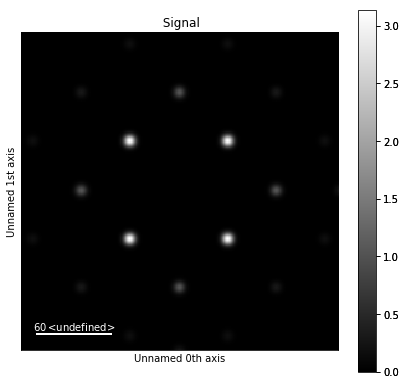

In [79]:
dp.plot()